In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv', index_col = 'car_ID')

# **Data Overview**

In [4]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
data.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

We can see there are no any Null value present in data and both numerical and catogiracl features are there in the dataset

# Data preprocessing

In [8]:
# adding new column - car brand (instead of car name)
data['CarBrand']=data['CarName'].apply(lambda x: x.split()[0])
#deleting carname column
del data['CarName']
                                   

In [9]:
data['CarBrand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarBrand, dtype: int64

**We can see some names are incorrect like toyouta, vokswagen etc , so let's correct it**

In [10]:
data=data.replace('vokswagen','volkswagen')
data=data.replace('toyouta','toyota')
data=data.replace('porcshce', 'porsche')
data=data.replace('Nissan','nissan')
data=data.replace('maxda', 'mazda')
data=data.replace('vw','volkswagen')

In [11]:
data['CarBrand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarBrand, dtype: int64

In [12]:
data = data.drop_duplicates()

In [13]:
# Finding numerical and categorical features count
data1 = data.drop(['price'], axis=1)
numerical_features = [col for col in data1 if data1[col].dtype != 'object']
categorical_features = [col for col in data1 if data1[col].dtype == 'object']

In [14]:
print("Numerical_features_count =", len(numerical_features))
print("Categorical_features_count =",len(categorical_features))

Numerical_features_count = 14
Categorical_features_count = 10


In [15]:
print(f'Numerical Columns:  {data[numerical_features].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical_features].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CarBrand'],
      dtype='object')


# Data Visulization

Text(0.5, 1.0, 'target(price) distribution')

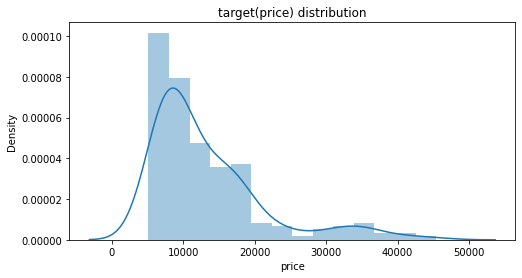

In [16]:
# For checking the skewedness of data's target, Drawing the target distribution
target = data['price']
fig=plt.figure(figsize=(8,4))
sns.distplot(target)
plt.title("target(price) distribution")


In [17]:
print("Skewnwess =", target.skew())

Skewnwess = 1.7776781560914454


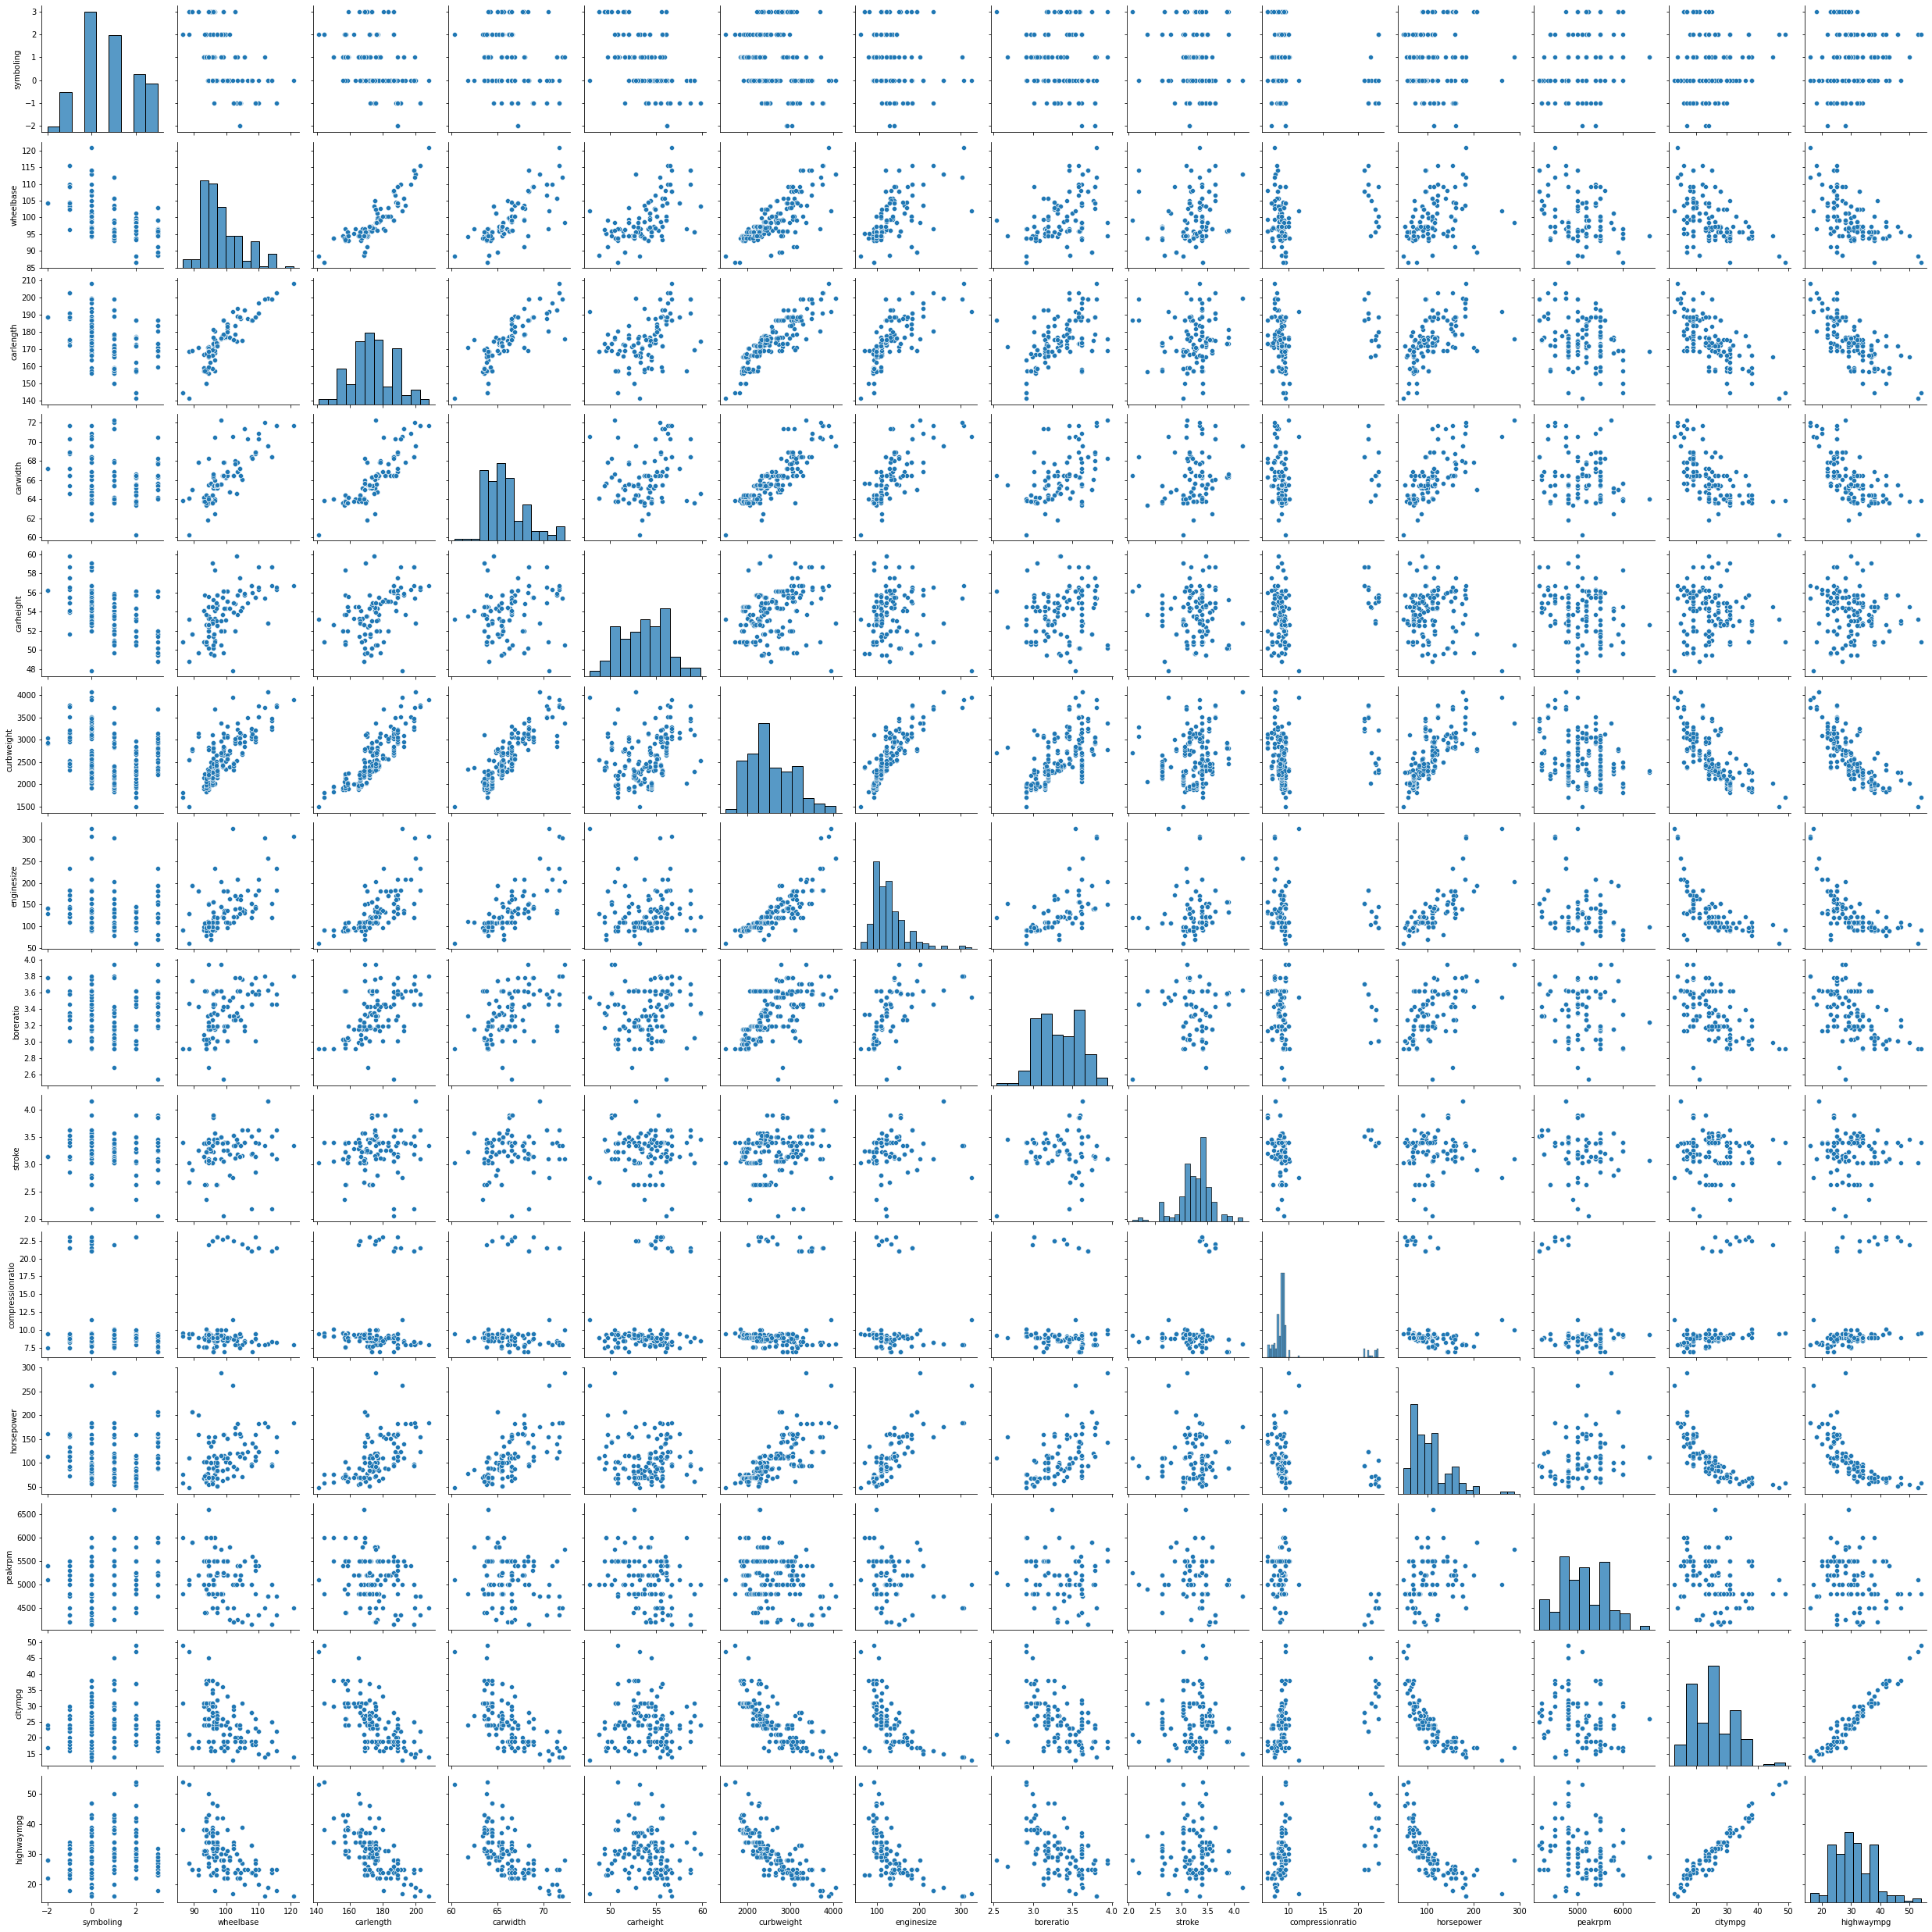

In [18]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[numerical_features])

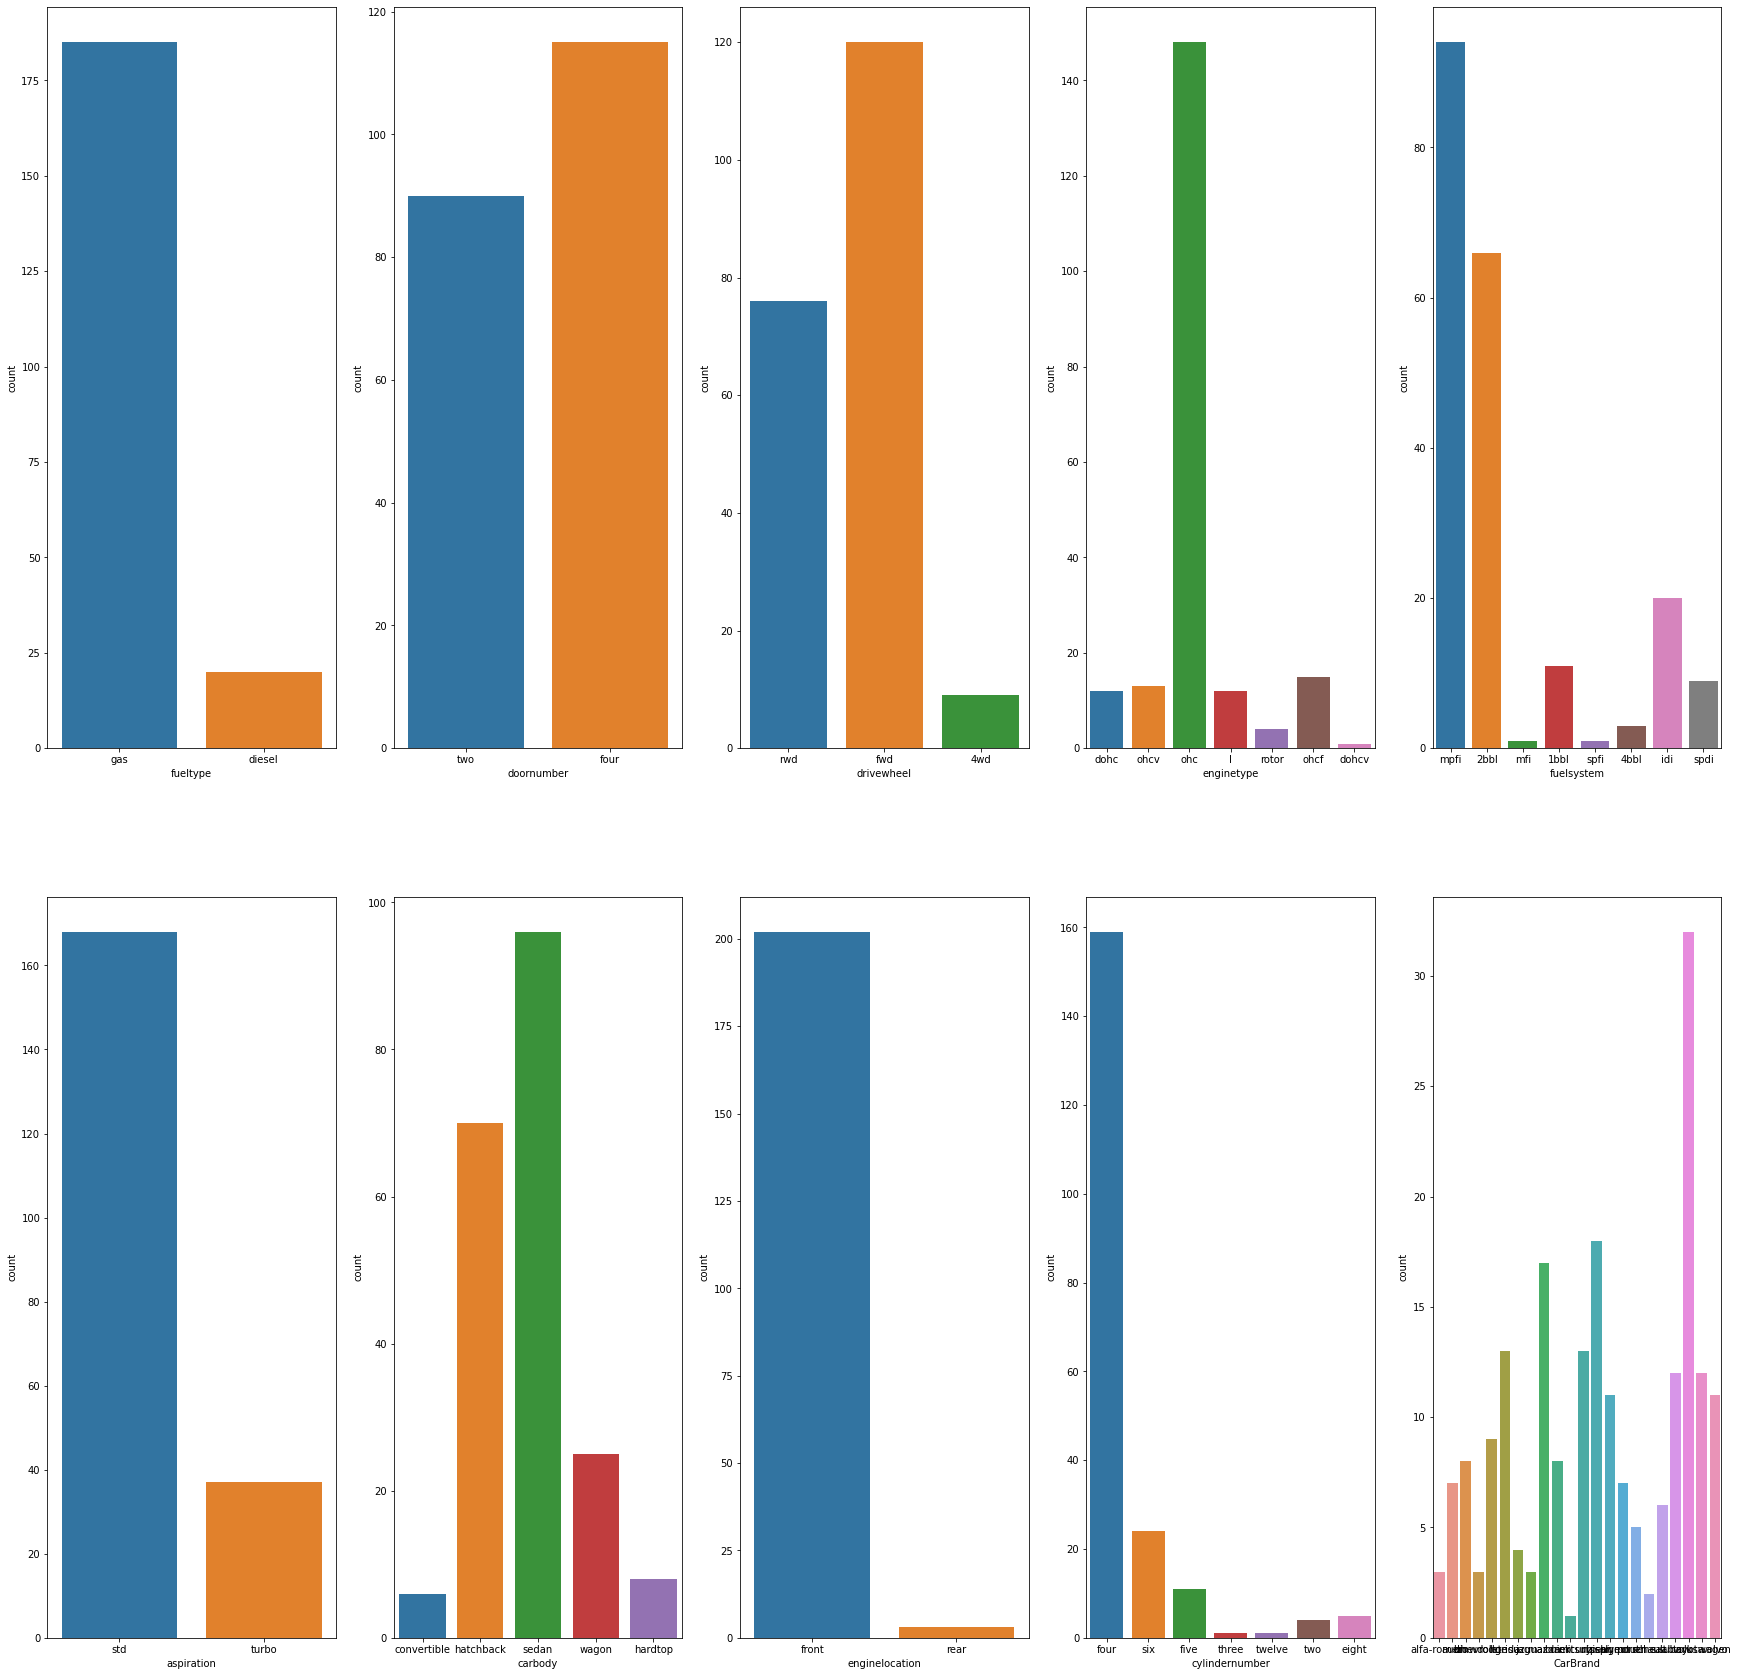

In [19]:
#categorical columns distribution
f, axes = plt.subplots(2,5 , figsize=(30, 30))
for i, feature in enumerate(categorical_features):
    sns.countplot(data = data, x = feature,ax=axes[i%2, i//2])

<AxesSubplot:>

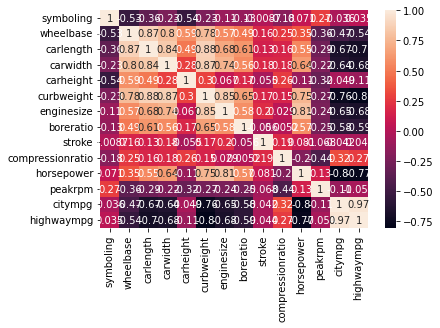

In [20]:
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot = True)

**Here we can see that citympg and highwaympg have high correlation, so dropping any one helps in good prediction.**

In [21]:
data = data.drop(['citympg'], axis=1)

<AxesSubplot:xlabel='CarBrand'>

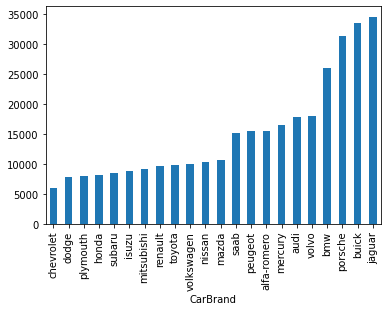

In [22]:
# distribution of different brands
data.groupby('CarBrand')['price'].mean().sort_values().plot(kind='bar')

In [23]:
# Extracting the target and features variable
y = data['price']
x = data.drop(['price'], axis=1)
print(x.shape)
print(y.shape)

(205, 23)
(205,)


In [24]:
# Encoding     
x = pd.get_dummies(x, columns =  categorical_features, drop_first=True)
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print(x.shape)
print(y.shape)

(205, 63)
(205,)


In [26]:
#power transforming target variable
y=np.log1p(y)

(205,)


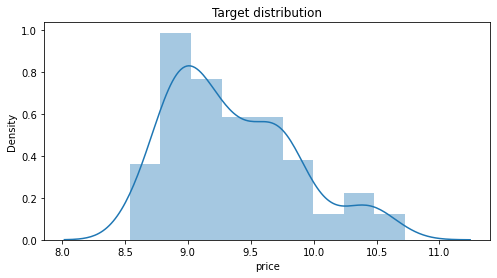

In [27]:
fig=plt.figure(figsize=(8,4))
sns.distplot(y)
plt.title("Target distribution")
print(y.shape)

In [28]:
print(y.skew()) # Here we can see skewedness of target variable decreased.

0.6729635607485753


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Building Model

In [30]:
# Division into train and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

**BaseLine Model = Linear Regression**

In [31]:
score_r2 = []
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
r2_linear = r2_score(y_pred_lr, y_test)
score_r2.append(r2_linear)
print("R2_sccore =",r2_linear)
print("Score_linear_reg =", lr.score(x_test, y_test))


R2_sccore = 0.9062254346134703
Score_linear_reg = 0.8946840563191748


**1. Lasso**

In [32]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(x_train, y_train)
y_pred_lasso = lassocv.predict(x_test)
r2_lasso = r2_score(y_pred_lasso, y_test)
score_r2.append(r2_lasso)
print("R2_score =", r2_lasso)
print("Score_lassocv =",lassocv.score(x_test, y_test))

R2_score = 0.924641369844631
Score_lassocv = 0.9234047159444067


**2.Ridge Regression**

In [33]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_train, y_train)
y_pred_ridge = rr.predict(x_test)
r2_ridge = r2_score(y_pred_ridge, y_test)
score_r2.append(r2_ridge)
print("R2_score =", r2_ridge)
print("Score_Ridge =",rr.score(x_test, y_test))

R2_score = 0.9169931974771025
Score_Ridge = 0.9113509688228281


**3. XGB Regressor**

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
r2_xgb = r2_score(y_pred_xgb, y_test)
score_r2.append(r2_xgb)
print("R2_score", r2_xgb)
print("Score_xgb +",xgb.score(x_test, y_test))

R2_score 0.9114632866587583
Score_xgb + 0.9032813405652971


**4.Random Forest Regressor**

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 220, random_state = 42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_rf = r2_score(y_pred_rf, y_test)
score_r2.append(r2_rf)
print("R2_score =", r2_rf)
print("Score_RandomForest =",rf.score(x_test, y_test))

R2_score = 0.9218896482546959
Score_RandomForest = 0.9254855419736839


In [36]:
model_names = ['LinearRegression', 'Lassocv', 'RidgeRegression', 'XGB', 'RandomForest']
result_df = pd.DataFrame({'R2_score':score_r2}, index  = model_names)
result_df

,R2_score
LinearRegression,0.906225
Lassocv,0.924641
RidgeRegression,0.916993
XGB,0.911463
RandomForest,0.921890


**From the table we can see that Lassocv is the best model**